In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [9]:
data = pd.read_csv('bd_cases.csv', parse_dates=["Date"], index_col="Date")
print(data)
accumulated_count = data.cumsum()
# print(x)
data = data.resample('D').first().fillna(0).cumsum()
data = data[22:]
x = np.arange(len(data)).reshape(-1, 1)
print(data)
print(len(data))
y = data.values
print(y)

            Case
Date            
2020-03-08     3
2020-03-09     0
2020-03-10     0
2020-03-11     0
2020-03-12     0
2020-03-13     0
2020-03-14     0
2020-03-15     2
2020-03-16     3
2020-03-17     2
2020-03-18     4
2020-03-19     3
2020-03-20     3
2020-03-21     4
2020-03-22     3
2020-03-23     6
2020-03-24     6
2020-03-25     0
2020-03-26     5
2020-03-27     4
2020-03-28     0
2020-03-29     0
2020-03-30     1
2020-03-31     2
2020-04-01     3
2020-04-02     2
2020-04-03     5
2020-04-04     9
2020-04-05    18
2020-04-06    35
2020-04-07    41
2020-04-08    54
2020-04-09   112
2020-04-10    94
2020-04-11    58
2020-04-12   139
2020-04-13   182
2020-04-14   209
2020-04-15   268
2020-04-16   292
2020-04-17   266
2020-04-18   306
2020-04-19   312
2020-04-20   492
2020-04-21   434
2020-04-22   390
2020-04-23   414
2020-04-24   503
2020-04-25   309
            Case
Date            
2020-03-30    49
2020-03-31    51
2020-04-01    54
2020-04-02    56
2020-04-03    61
2020-04-04    

In [7]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [10]:
test = np.arange(len(data)+7).reshape(-1, 1)
print(test)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
print(week)
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)
print(predicted_count)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]]
[Timestamp('2020-03-30 00:00:00', freq='D'), Timestamp('2020-03-31 00:00:00', freq='D'), Timestamp('2020-04-01 00:00:00', freq='D'), Timestamp('2020-04-02 00:00:00', freq='D'), Timestamp('2020-04-03 00:00:00', freq='D'), Timestamp('2020-04-04 00:00:00', freq='D'), Timestamp('2020-04-05 00:00:00', freq='D'), Timestamp('2020-04-06 00:00:00', freq='D'), Timestamp('2020-04-07 00:00:00', freq='D'), Timestamp('2020-04-08 00:00:00', freq='D'), Timestamp('2020-04-09 00:00:00', freq='D'), Timestamp('2020-04-10 00:00:00', freq='D'), Timestamp('2020-04-11 00:00:00', freq='D'), Timestamp('2020-04-12 00:00:00', freq='D'), Timestamp('2020-04-13 00:00:00', freq='D'), Timestamp('2020-04-14 00:00:00', freq='D'), Timestamp('2020-04-15 00:00:00', freq='D'), Timestamp('2020-04-16 00:00:00', freq='D'), Ti

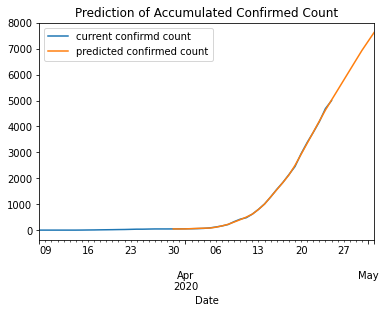

In [6]:
accumulated_count.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()

In [12]:
confirm_cs = data#pd.DataFrame(data).cumsum()
arima_data = confirm_cs.reset_index()
print(arima_data)
arima_data.columns = ['confirmed_date','count']
print(arima_data.head())

model = ARIMA(arima_data['count'].values, order=(1, 2, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()


         Date  Case
0  2020-03-30    49
1  2020-03-31    51
2  2020-04-01    54
3  2020-04-02    56
4  2020-04-03    61
5  2020-04-04    70
6  2020-04-05    88
7  2020-04-06   123
8  2020-04-07   164
9  2020-04-08   218
10 2020-04-09   330
11 2020-04-10   424
12 2020-04-11   482
13 2020-04-12   621
14 2020-04-13   803
15 2020-04-14  1012
16 2020-04-15  1280
17 2020-04-16  1572
18 2020-04-17  1838
19 2020-04-18  2144
20 2020-04-19  2456
21 2020-04-20  2948
22 2020-04-21  3382
23 2020-04-22  3772
24 2020-04-23  4186
25 2020-04-24  4689
26 2020-04-25  4998
  confirmed_date  count
0     2020-03-30     49
1     2020-03-31     51
2     2020-04-01     54
3     2020-04-02     56
4     2020-04-03     61


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   25
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -136.984
Method:                       css-mle   S.D. of innovations             57.545
Date:                Mon, 27 Apr 2020   AIC                            281.968
Time:                        02:34:16   BIC                            286.843
Sample:                             2   HQIC                           283.320
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0438      5.736      2.971      0.003       5.802      28.286
ar.L1.D2.y    -0.0284      0.432     -0.066      0.948      -0.875       0.818
ma.L1.D2.y    -0.5503      0.358     -1.536      0.125      -1.253       0.152
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -35.2509           +0.0000j           35.2509            0.5000
MA.1            1.8171           +0.0000j            1.8171            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
forcast = fit_model.forecast(steps=5)
pred_y = forcast[0].tolist()
pd.DataFrame(pred_y)

,0
0,5427.225828
1,5870.568427
2,6331.037903
3,6808.548866
4,7303.103738


In [10]:
dataset = pd.DataFrame(data)
# dataset.columns = ['Confirmed']
# dataset.head()

In [11]:
data = np.array(dataset).reshape(-1, 1)
train_data = dataset
print(train_data)
test_data = dataset[len(dataset)-5:]
print(test_data)

            Case
Date            
2020-03-30    49
2020-03-31    51
2020-04-01    54
2020-04-02    56
2020-04-03    61
2020-04-04    70
2020-04-05    88
2020-04-06   123
2020-04-07   164
2020-04-08   218
2020-04-09   330
2020-04-10   424
2020-04-11   482
2020-04-12   621
2020-04-13   803
2020-04-14  1012
2020-04-15  1280
2020-04-16  1572
2020-04-17  1838
2020-04-18  2144
2020-04-19  2456
2020-04-20  2948
2020-04-21  3382
2020-04-22  3772
2020-04-23  4186
2020-04-24  4689
            Case
Date            
2020-04-20  2948
2020-04-21  3382
2020-04-22  3772
2020-04-23  4186
2020-04-24  4689


In [12]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
n_input =5
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_input, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(generator, epochs = 21)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/21
21/21 [==============================] - 2s 82ms/step - loss: 0.1473
Epoch 2/21
21/21 [==============================] - 0s 8ms/step - loss: 0.0744
Epoch 3/21
21/21 [==============================] - 0s 9ms/step - loss: 0.0355
Epoch 4/21
21/21 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 5/21
21/21 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 6/21
21/21 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 7/21
21/21 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 8/21
21/21 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 9/21
21/21 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 10/21
21/21 [==============================] 

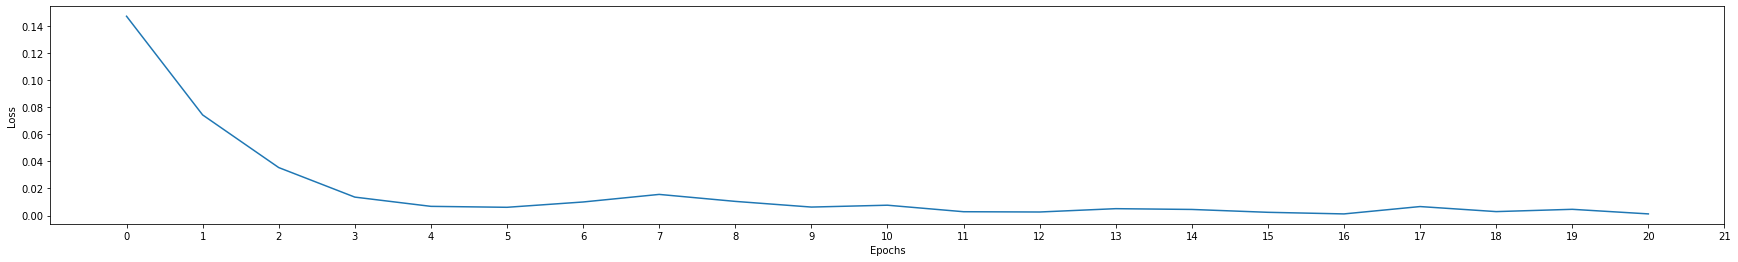

In [13]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (30,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,100,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [14]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [31]:
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))
prediction.tail()

,0
0,5452.728061
1,5868.069030
2,6246.683703
3,6614.834447
4,6968.569423
